TITLE:  Open Data Science P3: SMK API key <fisker>
DATE:   1 January, 2020
NAME:   Jessica Gress-Wright, tsp932
    

1.  Beskriv (med reference fx SMK har discussion om hvorfor de har åbne data se SMK Open projekt) hvorfor institutionen har en API tilgang til deres datasæt, hvad det er blevet brugt til og/eller hvad de tænker det kunne bruges til?

Statens Museum for Kunst (SMK) initiated the project Open SMK in 2016. As they describe it, SMK Open "bygger på en vision om at gøre kunsten tilgængelig og relevant for langt flere danskere ved at bringe den i spil som en ressource og et redskab, man kan tage med ind i sit eget liv og bruge på sine egne vilkår." (Statens Museum for Kunst, 2016) 

The SMK Open project is part of SMK’s groundbreaking reorientation towards the digital and the open (Sanderhoff, 2014b). It is a way to use digital technology constructively to give users new opportunities and to establish a new, in many ways more equal, relationship between the institution and the user, because digital technology enables access at any time and place as well as active interaction by users (Sanderhoff, 2014a). As Sanderhoff, the head of SMK, puts it, "Verden over digitaliserer og deler museer frit deres samlinger for at imødekomme nutidens og morgendagens kulturforbrugere, som ikke bare vil være tilskuere til kulturen. De vil være aktive deltagere, og de vil bruge kulturen i deres eget liv. Og erfaringen er klar: Langt flere – også dem, der ellers ikke benytter museet – bruger samlingerne, når de selv aktivt kan udvælge, genbruge, remixe og dele værker. Disse initiativer går under de generelle overskrifter open access og open data – eller den mere specifikke #openglam (hvor GLAM står for Galleries, Libraries, Archives, Museums)" (Statens Museum for Kunst, 2016).


SMK Open consists primarily of two parts. One part of SMK Open is the interactive web page. The webpage gives the user an easy way to explore what SMK’s staff have themselves selected and set up, such as selected paintings, genres, and topics, and can provide insights not possible with a physical visit (such as looking at X-ray details of a painting). The user can also use the webpage’s search functions. Nevertheless, there what is available to search is ultimately chosen by staff. The difference between access to a collection via SMK’s webpage and via their API is the difference between the ability to explore and experience what SMK’s staff curate for the user vs. the ability of the user directly to access and analyze the raw underlying metadata. In contrast, access to an API enables users to do their own research and exploration in the raw underlying registry data, as this Portfolio 3 exercise demonstrates. The second part is SMK’s open-access API. With API access, SMK open their collection registry database to the public. In other words, users can use the API to gain access to the metadata for each registered object in the collection. The API allows users directly to access and explore the raw metadata of the registry for example, by means of the programming language. Python. While not all of the collection is digitized, much of it is, much more than is available in a physical visit, which shows about .7% of the collection at any given time. 


Not all of the collection is at yet accessible through the API. Although the museum’s collection encompasses 260,000 works, as yet only 70,000 are registered with metadata in the database, 40,000 are digitized (i.e. photographed and image entered in database, and of those 15,000 are photographed in high quality. Of the collection, two-thirds is in the public domain and SMK has decided that any images of these works will also be in the public domain and may therefore be used freely. How many actually use the API? There are no exact figures. External partners can gain access to the API and download the entire data set for integration with their own applications and systems. While the formal target group for Open SMK is all users, SMK Open has two specific target groups: school teachers and artists and creative developers who wish to use the available images in their own works from the SMK platform (including website and API). Many of these will be using the more accessible website. SMK has also reached out to those users who are “digitally literate, “ for example the “Hack4DK” community. This community’s open mailing list from ca. 2014 lists 76 members (OPD P3 SMK Open API users HACK4DK Community Members - Google Sheets, no date). It would thus appear that, as yet, only a few users have the skills to use the API.


2.	Sammensæt en URL der søger efter kulturinstitutionens elementer (fx. genstande, kunstværker, personer, avisartikler, osv.) i APIen (gerne 100+ stk) med output i JSON. Load denne URL i en JSON beautifier og beskriv indholdet:
a.	Hvilken typer metadata er der for hver element?
b.	Sammenlign metadata med Dublin Core. Er der overensstemmelse?
c.	Er der nogle tal der kan bruges til statistiske beregninger (fx. årstal)?
d.	Hvilke slags spørgsmål kunne besvares gennem analyse af dette datasæt? (gerne med eksempler)

In [1]:
import pandas as pd
import requests

api_search_url = 'https://api.smk.dk/api/v1/art/search/'
params = {
    'keys': 'fisker', # Search for this keyword
    'rows': 100, # however many
    }
response = requests.get(api_search_url, params=params) 
data = response.json()
response

<Response [200]>

The code to import jason and beautify the results is:

In [2]:
import json
from pygments import highlight, lexers, formatters
# This uses Python's JSON module to output the results as nicely indented text
formatted_data = json.dumps(data, indent=2)
# This colours the text
highlighted_data = highlight(formatted_data, lexers.JsonLexer(), formatters.TerminalFormatter())
# And now display the results
print(highlighted_data)


{
  "offset": 0,
  "rows": 100,
  "found": 254,
  "items": [
    {
      "id": "1180059103_object",
      "created": "2019-08-07T06:39:04Z",
      "modified": "2019-08-12T09:42:22Z",
      "acquisition_date_precision": "1902-12-31",
      "responsible_department": "Samling og Forskning (KMS)",
      "frame_notes": [
        "Bagkl\u00e6dning: false",
        "Mikroklimaramme: false"
      ],
      "dimensions": [
        {
          "notes": "630 x 780 mm",
          "part": "netto",
          "type": "hojde",
          "unit": "cm",
          "value": "63"
        },
        {
          "notes": "630 x 780 mm",
          "part": "netto",
          "type": "bredde",
          "unit": "cm",
          "value": "78"
        }
      ],
      "inscriptions": [
        {
          "content": "F. Van Cuyck de Mierhop.",
          "position": "f.n.m.f."
        }
      ],
      "materials": [
        {
          "material": "l\u00e6rred"
        },
        {
          "material": "olie"
      

2a. Hvilken typer metadata er der for hver element?


First, careful reading of the .json output shows that each representation of an object (i.e. entry in the data set) is distinguished by brackets [] with its metadata indicated by {}, and submetadata indicated by indented brackets [].

(NOTE SEE ALSO 3.i).  Once beautified, one can see that there are 69 data fields:
"id":, "created":, "modified":, "acquisition_date_precision":, "responsible_department":, "collection":, "frame_notes":, "Bagkl\u00e6dning:, "Mikroklimaramme:, "dimensions":, "notes":, "part":, "type":, "unit":, "value":, "notes":, "part":, "type":, "unit":, "value":, "notes":, "part":, "type":, "unit":, "value":, "documentation":, "title":, "author":, "notes":, "shelfmark":, "title":, "author":, "notes":, "shelfmark":, "inscriptions":, "content":, "position":, "materials":, "material":, "object_names":, "name":, "production":, "creator":, "creator_date_of_birth":, "creator_date_of_death":, "creator_nationality":, "creator_lref":, "production_date":, "start":, "end":, "period":, "related_objects":, "notes":, "techniques":, "technique":, "titles":, "title":, "language":, "type":, "language":, "translation":, "number_of_parts":, "object_history_note":, "object_number":, "iiif_manifest":, "public_domain":, "rights":, "on_display":, "has_image":,

These data fields are "metadata" in the words original meaning.  "Metadata" is a term first coined in the 1970's as a generic term for the titles of columns in databases  (Rosenfeld, Morville and Arango, 2006; Chowdhury, 2010).  That is exactly what we have here.

At the same time, when we examine the SMK fields, we can see that some of field names repeat ("notes", "unit", "value"). This is discussed more below in the comparison with Dublin Core.  


Broadly, the metadata can be divided into the following categories: 

1) The administrative metadata having to do with the registration of the work, such as "id" i.e. id number, "created" i.e. the date the registry entry was created; "modified", the date, if any, in which the entry was changed; "acquisition date precision", the date acquired; "responsible department".

2) Metadata having to do with the object itself as a physical object, such as "mikroklimaramme" i.e. whether there is a special protective frame; "dimensions" which is further subdivided into submetadata.  These submetadata define each dimension of the work in detail: "notes" (overall dimensions height by width in mm); "part" (e.g. "netto"--can this be whether the dimensions refer to the object itself or object plus frame?), "type" (e.g. breadth or height); "unit" (e.g. cm), "value" (e.g. 63 cm).  In the object description there are also metadata for inscriptions (both "content" and "position"); "materials" (e.g. the ground material, such as canvas, as well as the medium used, such as oils); and, not least, what kind of object it is (e.g. painting)

3) Metadata having to do with "production" i.e. the creation of the work, such as the creator's name (e.g. "Cuyck de Myerhop, Frans van (Jonkheer)"), date of birth, date of death, his nationality, his life history (if known, such as "born in Brugge"), period of artistic production, the techniques used ("oil on canvas"--N.B. seems repetitive) and the work's title in various languages e.g. "title" "Fisk", "language" "da-DK", "type" "MUSEUM"

4) Metadata having to do with the "object history" i.e. the institutional history of storing and display of the work in the collection, such as "notes" which here list former catalogue numbers; how many parts the object contains (e.g. the painting "Fisk" has 1 part), where and when the object was lent out or displayed.

5) Last, what might be called "digital metadata" giving the API URL, copyright information and digitization information,including whether the object is on display physically, whether it is photographed, whether there is a thumbnail (with address), etc. This digitization metadata consists of "object_number";   "object_url", which gives the API address of (here: "https://api.smk.dk/api/v1/art/?object_number=kms1736"),"iiif_manifest": "https://api.smk.dk/api/v1/iiif/manifest/?id=kms1736","public_domain": true, "rights": "https://creativecommons.org/share-your-work/public-domain/cc0/", "on_display": false,"has_image": true,"image_thumbnail": "https://api.smk.dk/api/v1/thumbnail/60be0fff-2874-4e2f-847c-5763a174d4af.jpg", "image_native": "https://api.smk.dk/api/v1/thumbnail/60be0fff-2874-4e2f-847c-5763a174d4af.jpg"; "colors": "#000000","#000000","#000000","#000000","#674200".

6) Nevertheless, subject metadata such as “subject”, “theme” or “key words” seem to be missing.  This will be discussed below.


2b.  Sammenlign metadata med Dublin Core. Er der overensstemmelse?


Dublin Core is a standard for metadata used in Resource Description and Access (RDA), i.e. the organization of knowledge or information with a view to four key tasks in information retrieval: finding, identifying, selecting and retrieving.  Dublin Core is one of several standards (others are ISBD Standard and MARC21), which build on FRBR or the more extensive FRAD (Functional Requirements for Authority Data).  Dublin Core follows FRAD quite closely in its level of detail (Tellufsen, 2017a, 2017b).

First, FRAD has overarching categories called “Entities”.  For example, the FRAD standard Entity One is a set of submetadata all related to the work itself (for example "Romeo and Juliet" or the painting "Fisk").  FRAD standard Entity Two refers to all the submetadata related to the creator (name, date of birth, period of activity, country of origin, etc.).  Entity Three refers to the subject of the work. (Tellufsen, 2017a).


The Dublin core metadata types:
 
DC.TITLE
DC.CREATOR
DC.SUBJECT
DC.DESCRIPTION
DC.PUBLISHER
DC.CONTRIBUTORS
DC.DATE
DC.TYPE
DC.FORMAT
DC.IDENTIFIER
DC.SOURCE
DC.LANGUAGE
DC.RELATION
DC.COVERAGE
DC.RIGHTS


If we compare SMK's 69 datafelter above with 'Dublin Core', we can see differences. Dublin Core is more consistent and structured.  The fields do not repeat. By comparison, SMK is "messy". 

There are, nevertheless, significant similarities between Dublin Core and SMK’s metadata.  For example, both have Entity One and Two, for example, "work" and "creator", which both reflect the underlying FRAD standard of metadata.  In addition, both have metadata for “identifier” and “rights”.

There are nevertheless differences between SMK's metadata and Dublin Core. For example, in SMK there is room for more details about the physical object, as discussed above in 2a.  Moreover, there is room for more detail about an object’s institutional and administrative history in SMK than in Dublin Core.


The most significant difference, however, is SMK’s apparent lack of an explicite FRAD Entity Three, which is subject metadata.  There appears to be no separate metadata for “subject” nor a category for “keywords”.  True, this category may be covered by one or more of the "notes" fields.  Or it may be covered by the "content" field.  But in practice, representations can lack information on subject.  For example, this portfolio’s API URL  used the key word "fisker".  The first representation returned was of a 17th century Flemish painting entitled "Fisk". The second return had the word "fisk" under "technique" ("technique" = marionetterekvisit (fisk på en pind)).  Neither had keywords or explicit subject metadata.
The inconsistent subject metadata means, moreover, that the key "fisker" may not return objects which are somehow about fisherman or which portray fisherman, unless the word “fisk*” explicity appears in the title, in technique or elsewhere.  SMK’s API will not, it seems, return a painting of fishermen at sea with the title “Ocean”.  Further,  because the API treats “fisker” like “fisk*”, it will return objects about fish even though a fisherman is a very different thing than a fish.  In other words, the SMK’s API poses significant risks of both false positives and false negatives in anything approaching a subject or theme search.

This may make the task of doing research in the SMK API far more difficult, because it is difficult to gain consistent access to information about an object’s content or theme.  


2c.  Er der nogle tal der kan bruges til statistiske beregninger (fx. årstal)?


In principle, the dates of acquisition, or the creator's date of birth or period of artistic production could be the source of statistics.  In practice, other student groups have found that, overall, the data is too messy to be used for this purpose, because some entries are incomplete.  In this portfolio, I therefore chose to create statistics on the number of acquisitions with the key "Fisker" = true per year, over a number of years.  But even this poses problems, as discussed in 2b. 

In practice, the most promising fields to run statistics on likely are:  “acquisition_date_precision”, “production_date” and “ creator_nationality”.


2d.	Hvilke slags spørgsmål kunne besvares gennem analyse af dette datasæt? (gerne med eksempler)

In theory, it would be possible to relate data between any or several of the metadata categories.  Examples of questions could be:  
•	How many works are by a given artist, or from a given period, or in a given medium? 
•	What kinds of works (e.g. paintings in oils), or works by which artists, are most (or least) frequently displayed?  
•	Is there a change over time in which works are most frequently displayed?


3.	Ved hjælp af Pandas og request, importér nu jeres valgte datasæt.  Beskriv og rens datasættet. 
i.	Hvilke data og datatyper er der? Fx. årstal, text, navne, billed, mm. SR
ii.	Hvor mange kolonner og rækker?
iii.	Er der kolonner I ikke skal bruge?

In [14]:
from pandas.io.json import json_normalize
df = json_normalize(data['items'])
df


,id,created,modified,acquisition_date_precision,responsible_department,frame_notes,dimensions,inscriptions,materials,object_names,...,parts,collection,production_dates_notes,content_description,exhibitions,current_location_name,distinguishing_features,work_status,content_subject,content_person
0,1180059103_object,2019-08-07T06:39:04Z,2019-08-12T09:42:22Z,1902-12-31,Samling og Forskning (KMS),"[Bagklædning: false, Mikroklimaramme: false]","[{'notes': '630 x 780 mm', 'part': 'netto', 't...","[{'content': 'F. Van Cuyck de Mierhop.', 'posi...","[{'material': 'lærred'}, {'material': 'olie'}]",[{'name': 'maleri'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1180069781_object,2019-08-07T07:22:43Z,2019-08-12T09:46:39Z,2012-08-21,Samling og Forskning (KMS),"[Bagklædning: false, Mikroklimaramme: false]",NaN,NaN,NaN,[{'name': 'installation'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1180075563_object,2019-08-07T07:45:47Z,2019-08-08T08:22:09Z,2012-08-21,Samling og Forskning (KMS),"[Bagklædning: false, Mikroklimaramme: false]",NaN,NaN,NaN,[{'name': 'installation'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1180080427_object,2019-08-07T08:05:52Z,2019-08-12T09:50:32Z,2012-08-21,Samling og Forskning (KMS),"[Bagklædning: false, Mikroklimaramme: false]",NaN,NaN,NaN,[{'name': 'installation'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1180002013_object,2019-08-07T03:28:20Z,2019-08-08T08:16:43Z,1992-12-31,Samling og Forskning (KKS),"[Bagklædning: false, Mikroklimaramme: false]","[{'notes': '296 x 210 mm', 'part': 'bladmaal',...","[{'content': 'Blindstempel f.n.midtfor: ""MOGEN...",NaN,[{'name': 'tegning'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1180054397_object,2019-08-07T06:21:13Z,2019-08-08T08:33:58Z,1998-12-31,Samling og Forskning (KKS),"[Bagklædning: false, Mikroklimaramme: false]","[{'notes': '295 x 413 mm', 'part': 'bladmaal',...",NaN,NaN,[{'name': 'grafik'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,1180060695_object,2019-08-07T06:45:36Z,2019-08-12T09:43:01Z,1898-12-31,Samling og Forskning (KAS),"[Bagklædning: false, Mikroklimaramme: false]","[{'notes': '1780 x mm', 'type': 'hojde', 'uni...",NaN,[{'material': 'gips'}],[{'name': 'statue'}],...,[ORIG2209],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,1180064621_object,2019-08-07T07:02:06Z,2019-08-12T09:44:38Z,1876-12-31,Samling og Forskning (KMS),"[Bagklædning: false, Mikroklimaramme: false]","[{'notes': '541 x 435 x 63 mm', 'part': 'brutt...",[{'content': '(langs kanten) Carl Bloch 1875 '...,"[{'material': 'træ'}, {'material': 'olie'}]",[{'name': 'maleri'}],...,NaN,NaN,NaN,NaN,[{'exhibition': 'Carl Bloch - kunst eller kits...,Sal 220,NaN,NaN,[København],NaN
98,1180066626_object,2019-08-07T07:10:24Z,2019-08-08T08:36:53Z,1887-01-01,Samling og Forskning (KKS),"[Bagklædning: false, Mikroklimaramme: false]","[{'notes': '249 x 394 mm', 'part': 'bladmaal',...",NaN,NaN,[{'name': 'blyant'}],...,NaN,[Gammel bestand],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As shown in 2a above, there are 69 datafields total in the structure, yet the dataframe has 50 columns.  The reason is that certain columns, such as "dimensions", subsume several submetadata fields.


3ii. Hvor mange kolonner og rækker? 


There are 50 columns and 100 rows.


3iii. Er der kolonner I ikke skal bruge?


Not all the columns can be used, because many of the rows have "NaN", no information. 


4.	Lav nu udtræk og beregn på det data I har udvalgt. Hvilke informationer kan det give os om de udvalgte elementer? 

Selecting columns will return a new dataframe. The most promising fields to run statistics on likely are:
    acquisition_date_precision
    production_date
    creator_nationality
    
I choose “acquisition_date_precision” for two reasons.  First, print(df.dtypes)shows that acquisition_date_precision is a "datetime64[ns]" and this one can be used for statistics.  Second, it is consistent down the rows.  The other promising possibilities, “production_date” and “creator_nationality” are not available in this sample.



5.	Brug value_counts() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) funktionen til at producere en dataframe over det udvalgte data, optælling og procent. TIP:  I modsætning til Trove skal man selv lave en optælling og vise i en dataframe.

From an analytical point of view, extracting the year allows statistics on how many aquisitions were made 
in each year. If we count the years in which a given number of acquisitions were made we can see the distribution.


In [4]:
import datetime
df['year'] = pd.DatetimeIndex(df['acquisition_date_precision']).year
df2 = df[['id','year','on_display']]
print(df2.dtypes)
#df2.value_counts(normalize=True)
aquired = df2['year'].value_counts(sort="True")
displayed = df2['on_display'].value_counts(sort=False)
print('------')
print(type(aquired))
print(aquired)


id             object
year          float64
on_display       bool
dtype: object
------
<class 'pandas.core.series.Series'>
1887.0    10
1972.0     8
1886.0     7
1973.0     6
1849.0     5
1949.0     4
1902.0     3
2012.0     3
1898.0     3
1695.0     2
1975.0     2
1761.0     2
1922.0     2
1890.0     2
1924.0     2
1994.0     2
1955.0     1
1976.0     1
1928.0     1
2006.0     1
1884.0     1
1959.0     1
1763.0     1
1874.0     1
1988.0     1
1992.0     1
1938.0     1
1935.0     1
1974.0     1
1910.0     1
1839.0     1
1945.0     1
1873.0     1
1905.0     1
1863.0     1
1929.0     1
1819.0     1
1979.0     1
1985.0     1
1909.0     1
1899.0     1
1876.0     1
1998.0     1
2000.0     1
1982.0     1
1896.0     1
1912.0     1
1944.0     1
Name: year, dtype: int64


6.	Visualisere det udvalgte data med procent i en graf. TIP forsøg med Altair men find en anden hvis nødvendigt.

In [10]:
from collections import Counter
numaqq=Counter(aquired)
print(numaqq)

Counter({1: 32, 2: 7, 3: 3, 10: 1, 8: 1, 7: 1, 6: 1, 5: 1, 4: 1})


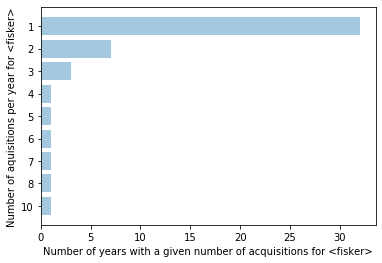

Figure 1:  Number of years with 1> of annual acquisitions for <fisker>, by number of annual acquisitons, 1695-2012


In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

keys = numaqq.keys()
y_pos = np.arange(len(keys))
# get the counts for each key, assuming the values are numerical
number = [numaqq[k] for k in keys]
 
plt.barh(y_pos, number, align='center', alpha=0.4)
plt.yticks(y_pos, keys)
plt.ylabel('Number of aquisitions per year for <fisker>')
plt.xlabel('Number of years with a given number of acquisitions for <fisker>') 

plt.show()
print("Figure 1:  Number of years with >0 annual acquisitions for <fisker>, by number of annual acquisitions, 1695-2012") 

An alternative visualization is as a pie chart.  This gives a more intuitive sense of how frequently there was just one acquisition with the key "fisker".


Figure 2:  Frequency of >0 acquisitions for <fisker> per year, by annual number of aquisitions, 1695-2012, in percent


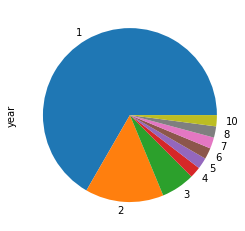

In [28]:
aquired.value_counts(sort=False).plot(kind='pie')
print("Figure 2:  Frequency of >0 acquisitions for <fisker> per year, by annual number of aquisitions, 1695-2012, in percent")


However, descriptive statistics are more precise:
    

In [19]:
aquired.describe()

count    48.000000
mean      1.979167
std       2.005202
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max      10.000000
Name: year, dtype: float64

The "count" 48 refers to the total number of years in which there was any acquisition with the key "fisker".  The mean number of acquisitions per year was close to 2.  The standard deviation ("std") was also ca. 2, which means that there was a wide variation.  In any year, the lowest number of acquisitions ("min").  The 25th percentile and the 50th percentile (i.e. median) were also 1.  This tells us that the number of acquisition in any given year was heavily weighted towards the minimum, i.e. one.  The 75th percentile was 2, yet the max was 10.  This tells us that there were very few years with over 2 acquisitions, which we can also see from Figures 1 and 2.


CONCLUSION: It is possible to create and visualize descriptive data for SMK's collection, provided the metadata types are appropriately selected. 


BIBLIOGRAPHY

Chowdhury, G. G. (2010) ‘1. Basic concepts of information retrieval systems’, in Introduction to modern information retrieval. 3rd edn. Facet Publishing, pp. 1–12.

OPD P3 SMK Open API users HACK4DK Community Members - Google Sheets (no date). Available at: https://docs.google.com/spreadsheets/d/1C_P3gn6D3owND5kd9yt3LL9lurqcXykx0Y1KMiK_fHM/edit#gid=0 (Accessed: 30 December 2019).

Rosenfeld, L., Morville, P. and Arango, J. (2006) ‘Thesauri, controlled vocabularies and metadata’, in Information architecture, for the Web and beyond. 4. edition. Sebastopol, CA: O’Reilly Media, pp. 285-.

Sanderhoff, M. (2014a) ‘Det er dit’, in Sanderhoff, M. (ed.) Sharing is Caring: Åbenhed og deling i kulturarvssektoren. København: Statens Museum for Kunst, pp. 20–131.

Sanderhoff, M. (Statens M. for K. (2017) ‘Kulturarv som råstof for ny kultur’. København: Åregangsforelæsning, 2017.09.13 ved Institut for Informationsvidenskab, Københavns Universitet.

Sanderhoff, Merete (2014b) ‘Om åbenhed og deling på Statens Museum for Kunst’, in Sanderhoff, M. (ed.) Sharing is Caring: Åbenhed og deling i kulturarvssektoren. København: Statens Museum for Kunst, pp. 20–131. Available at: sharingiscaring.smk.dk.

Statens Museum for Kunst (2016) SMK Open - Statens Museum for Kunst, SMK Open. København: Statens Museum for Kunst. Available at: http://www.smk.dk/om-museet/camp00/ (Accessed: 30 December 2019).

Tellufsen, M. (2017a) ‘Lektion 07 Metadata’. Præsentation uge 46, 2017.  København: Københavns Universitet, Institut for Informationsstudier.

Tellufsen, M. (2017b) ‘Lektion 08 FRBR og Zotero øvelse-2’. Præsentation uge 46, 2017.  København: Københavns Universitet, Institut for Informationsstudier.
